# Dados gradeados do Brasil (BR-DWGD)

Apresentação na UFRN (15/07/2022)

**Trabalhos dos dados**

* Xavier, A.C., King, C.W. and Scanlon, B.R. (2016), Daily gridded meteorological variables in Brazil (1980–2013). *International Journal of Climatology*, 36: 2644-2659. https://doi.org/10.1002/joc.4518

* Xavier, A. C., Scanlon, B. R., King, C. W., & Alves, A. I. (2022). New improved Brazilian daily weather gridded data (1961–2020). *International Journal of Climatology*, 1– 15. https://doi.org/10.1002/joc.7731





In [1]:
#!pip install cartopy
import glob
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from cartopy.feature import NaturalEarthFeature, BORDERS
import cartopy.crs as ccrs
import pdb
import seaborn as sns
from scipy import stats
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import LinearColorMapper, ColorBar
from bokeh.io import output_notebook
from bokeh.transform import transform
output_notebook()

Loading BokehJS ...

## Dados observados

In [2]:
obs_path = '/home/alexandre/Dropbox/grade_2020/data/netcdf_files/observed_data/'

pd.DataFrame([file.split("/")[-1] for file in glob.glob(obs_path + "*.npz")])

,0
0,u2.npz
1,Rs.npz
2,Tmin.npz
3,Tmax.npz
4,pr.npz


In [3]:
var_name = "Rs"
npzfile = np.load(obs_path + var_name + '.npz')
obs = npzfile['data']
latlon = npzfile['lat_lon_alt']
id = npzfile['id']
days = pd.date_range("1961-01-01", "2020-07-31")
#pd.DataFrame(days)
df = pd.DataFrame(latlon, columns=["lat","lon", "alt"])
df["ID"] = id
df

,lat,lon,alt,ID
0,-15.789343,-47.925755,1101.0,A001
1,-16.642841,-49.220222,737.0,A002
2,-17.745066,-49.101700,782.0,A003
3,-13.309528,-49.117477,354.0,A005
4,-10.190744,-48.301811,237.0,A009
...,...,...,...,...
1247,-20.699774,-44.819904,932.0,83637
1248,-29.196112,-51.186390,783.0,83942
1249,-32.150002,-52.099998,0.0,83994
1250,-26.920000,-49.049999,116.0,83871


Plotando todas as estações

In [4]:
# df.plot.scatter(x="lon", y="lat")

source = ColumnDataSource(data=dict(
    x=df["lon"], y=df["lat"], ID=df["ID"], row=range(len(df)),
    alt=df["alt"]
))
TOOLTIPS = [
    ("linha", "@row"),
    ("(lat,lon,alt)", "($y°, $x°, @alt m)"),
    ("ID", "@ID"),
]
p = figure(title="Estações " + var_name, width=400, height=400, tooltips=TOOLTIPS)
p.circle("x", "y", size=5, color="navy", alpha=0.5, source=source)
show(p)

Plotando dados observados de um estação

In [7]:
estacao = 912
source = ColumnDataSource(data=dict(
    x=days, y=obs[:,estacao]
))
TOOLTIPS = [
    ("valor obs:", "($y)"),
]
p = figure(title=var_name + " - esta. ID: " + id[estacao], 
           width=600, height=300, 
           x_axis_type='datetime', tooltips=TOOLTIPS)
p.line(x=days, y=obs[:,estacao])
show(p)

Plotando dados Observados de um dia

In [11]:
dia = -1000
index = ~np.isnan(obs[dia])
source = ColumnDataSource(data=dict(
    x=latlon[index, 1], y=latlon[index, 0], 
    c=obs[dia, index], alt=latlon[index, 2], ID=id[index],
))
color = LinearColorMapper(palette = 'Viridis256',
                          low = obs[dia, index].min(),
                          high = obs[dia, index].max())

TOOLTIPS = [
    ("ID", "@ID"),
    ("(lat,lon,alt)", "($y°, $x°, @alt m)"),
    ("valor obs:", "@c"),
]

p = figure(title=var_name + "- dia: " + str(days[dia])[:11], 
           width=400, height=400, tooltips=TOOLTIPS)
p.circle("x", "y", size=5, color = transform('c', color), 
         alpha=0.9, source=source)
show(p)

# Dados netcdf
Set correct path of the variables and controls

In [12]:
path_var =  '/home/alexandre/Dropbox/grade_2020/data/netcdf_files/'
path_control = '/home/alexandre/Dropbox/grade_2020/data/netcdf_files/Controls/'

nc_files = pd.DataFrame([file.split("/")[-1] for file in glob.glob(path_var + "*.nc")])
nc_files

,0
0,u2_20010101_20200731_BR-DWGD_UFES_UTEXAS_v_3.0.nc
1,pr_19610101_19801231_BR-DWGD_UFES_UTEXAS_v_3.0.nc
2,ETo_20010101_20200731_BR-DWGD_UFES_UTEXAS_v_3....
3,RH_19610101_19801231_BR-DWGD_UFES_UTEXAS_v_3.0.nc
4,Rs_19810101_20001231_BR-DWGD_UFES_UTEXAS_v_3.0.nc
5,Rs_19610101_19801231_BR-DWGD_UFES_UTEXAS_v_3.0.nc
6,u2_19810101_20001231_BR-DWGD_UFES_UTEXAS_v_3.0.nc
7,Rs_20010101_20200731_BR-DWGD_UFES_UTEXAS_v_3.0.nc
8,ETo_19810101_20001231_BR-DWGD_UFES_UTEXAS_v_3....
9,Tmin_20010101_20200731_BR-DWGD_UFES_UTEXAS_v_3...


# Exemplo 1
Plotando dados e controles para todo Brasil em um dia: Todos os arquivos da variavel diarios de Rs sao necessarios, ou seja, os de controle

Pegando as variáveis

In [13]:
name_var = 'Rs'
data = xr.open_mfdataset(path_var + name_var + '*.nc')
# data = xr.open_mfdataset(path_var + name_var + '*.nc').chunk(chunks={"time": 2000})
data_control = xr.open_mfdataset(path_control + name_var + '*.nc').chunk(chunks={"time": 2000})
Rs = data[name_var]
Rs_count = data_control['count']
Rs_dist_nearest = data_control['dist_nearest']

Escolhando o dia a ser plotado

In [14]:
day2get = '2015-01-01'

Plotando

(<matplotlib.collections.QuadMesh at 0x7f1c141a6b50>,
 (-73.89999389648438,
  -34.79999542236328,
  -33.89999771118164,
  5.399999618530273))

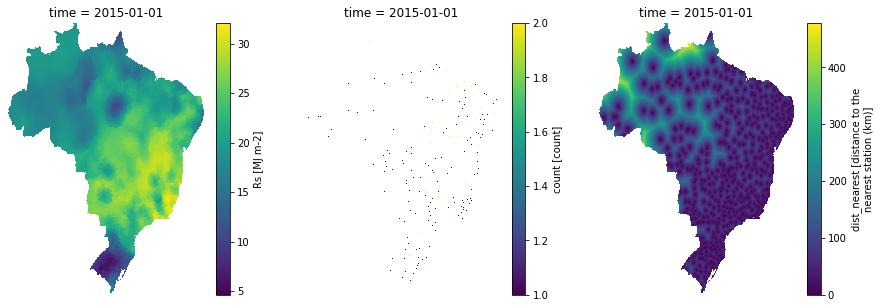

In [15]:
_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
Rs.sel(time=day2get).plot(ax=ax1), ax1.axis('off')
mask = Rs_count.sel(time=day2get) != 0
Rs_count.sel(time=day2get).where(mask).plot(ax=ax2), ax2.axis('off')
Rs_dist_nearest.sel(time=day2get).plot(ax=ax3), ax3.axis('off')

# Exemplo 2
Extraindo para uma posicao (Umuarama-PR) a serie historica diaria 
da temperatura maxima (Tmax), calculando a sua media 
mensal (01/01/1961-12/2010) e exportando dados diarios em arquivo cvs:

In [16]:
ds = xr.open_mfdataset(path_var + 'Tmax*.nc')
ds.Tmax

<xarray.DataArray 'Tmax' (time: 21762, latitude: 393, longitude: 391)>
dask.array<concatenate, shape=(21762, 393, 391), dtype=float32, chunksize=(7305, 393, 391), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1961-01-01 1961-01-02 ... 2020-07-31
  * latitude   (latitude) float32 -33.85 -33.75 -33.65 -33.55 ... 5.15 5.25 5.35
  * longitude  (longitude) float32 -73.85 -73.75 -73.65 ... -35.05 -34.95 -34.85
Attributes:
    units:          Celcius degrees
    standard_name:  Tmax
    _ChunkSizes:    [7305  393  391]

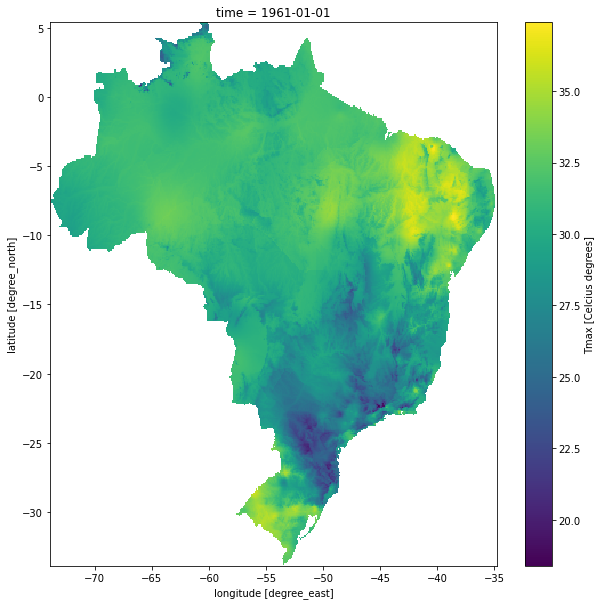

In [17]:
ds.Tmax.sel(time="1961-01-01").plot(aspect=1, size=10)


Pegando a variavel Tmax para um período qualquer

In [18]:
Tmax_data = ds.Tmax.sel(time=slice('2000-01-01','2009-12-31'))

pegando os dados para o posicao de Umuarama/Parana (lat-23.76,lon=-53.30)

In [19]:
lat, lon = -23.76, -53.30
Tmax_data_temporal = Tmax_data.sel(latitude=lat,longitude=lon, method='nearest')

Plotando dados diários e mensais para o posição

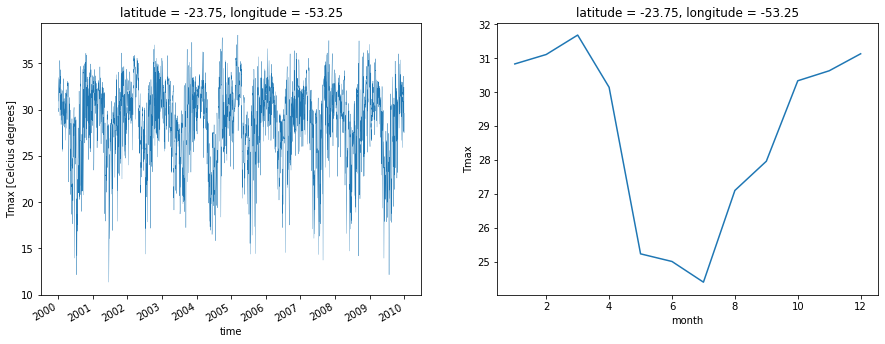

In [20]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# plotando a diaria
Tmax_data_temporal.plot(ax=ax1, linewidth=.3)

# plotando a media mensal
Tmax_mean_month = Tmax_data_temporal.groupby('time.month').mean('time')
Tmax_mean_month.plot(ax=ax2)

Exportando dados diarios em cvs: nome do arquivo 'Tmax.cvs'

In [21]:
fileName = 'Tmax.csv'
days = np.array(Tmax_data_temporal.time)
data_dataframe = pd.DataFrame(np.array(Tmax_data_temporal), index=days)
data_dataframe.to_csv(fileName, float_format='%.1f')

In [22]:
data_dataframe

,0
2000-01-01,30.140625
2000-01-02,30.125000
2000-01-03,29.765625
2000-01-04,31.468750
2000-01-05,33.468750
...,...
2009-12-27,27.625000
2009-12-28,30.812500
2009-12-29,32.437500
2009-12-30,27.500000


# Exemplo 3
Plotando media mensal da Umidade Relativa (1990-01-01-1999-12-31)

Pegando RH para o periodo e calculando a media mensal

In [23]:
ds = xr.open_mfdataset(path_var + 'RH*.nc')

# pegando a variavel RH entre '1990-01-01' a '2019-12-31'
RH_data = ds.RH.sel(time=slice('1990-01-01', '1999-12-31'))

# agrupando em media mensal
RH_mean_month = RH_data.groupby('time.month').mean('time')
RH_mean_month

<xarray.DataArray 'RH' (month: 12, latitude: 393, longitude: 391)>
dask.array<stack, shape=(12, 393, 391), dtype=float32, chunksize=(1, 393, 391), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 -33.85 -33.75 -33.65 -33.55 ... 5.15 5.25 5.35
  * longitude  (longitude) float32 -73.85 -73.75 -73.65 ... -35.05 -34.95 -34.85
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

Plotando

/home/alexandre/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


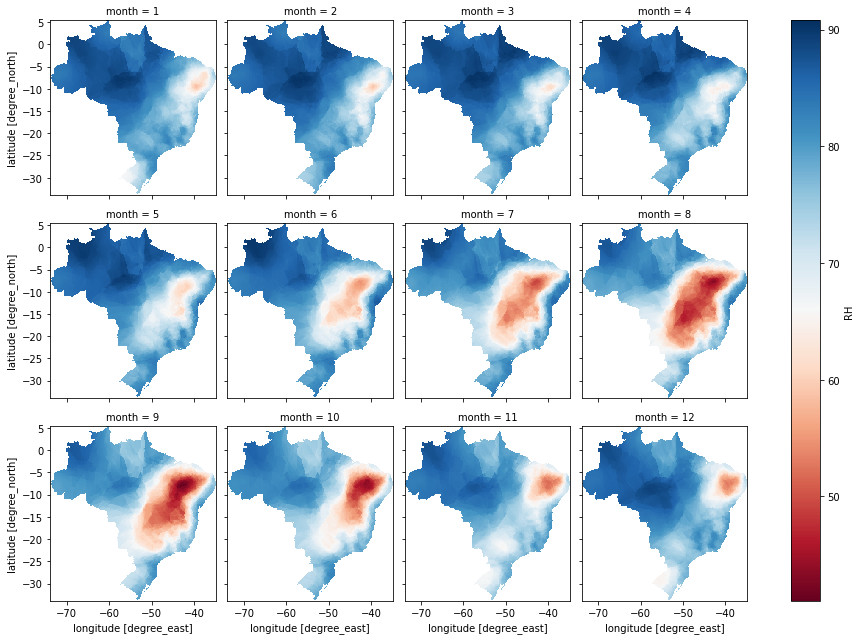

In [24]:
RH_mean_month.plot(x='longitude', y='latitude', col='month',
                   cmap='RdBu', col_wrap=4)

# Exemplo 4
Plotando a média mensal da ET0 para algumas cidades periodo 1961-01-01' ate '1989-12-31.

Pegando variável

In [25]:
var = xr.open_mfdataset(path_var + 'ETo*.nc').sel(time=slice('2000-01-01','2009-12-31'))["ETo"]
var


<xarray.DataArray 'ETo' (time: 3653, latitude: 393, longitude: 391)>
dask.array<getitem, shape=(3653, 393, 391), dtype=float32, chunksize=(3287, 393, 391), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2009-12-31
  * latitude   (latitude) float32 -33.85 -33.75 -33.65 -33.55 ... 5.15 5.25 5.35
  * longitude  (longitude) float32 -73.85 -73.75 -73.65 ... -35.05 -34.95 -34.85
Attributes:
    units:          mm
    standard_name:  ETo
    _ChunkSizes:    [7305  393  391]

Cidades e coordenadas

In [26]:
cityInformation = {
    'Santa Maria-RS': [-29.7, -53.7],
    'Manaus-AM': [-3., -60.],
    'Petrolina-PE': [-9.4, -40.5],
    'Alegre-ES': [-20.7, -41.5]
}
print(cityInformation)

{'Santa Maria-RS': [-29.7, -53.7], 'Manaus-AM': [-3.0, -60.0], 'Petrolina-PE': [-9.4, -40.5], 'Alegre-ES': [-20.7, -41.5]}


Calculando a média mensal

In [27]:
varMean = var.resample(time='M').mean('time')
varMean

<xarray.DataArray 'ETo' (time: 120, latitude: 393, longitude: 391)>
dask.array<stack, shape=(120, 393, 391), dtype=float32, chunksize=(1, 393, 391), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 2000-01-31 2000-02-29 ... 2009-12-31
  * latitude   (latitude) float32 -33.85 -33.75 -33.65 -33.55 ... 5.15 5.25 5.35
  * longitude  (longitude) float32 -73.85 -73.75 -73.65 ... -35.05 -34.95 -34.85

Plotando

Santa Maria-RS


/home/alexandre/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Manaus-AM


/home/alexandre/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Petrolina-PE


/home/alexandre/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Alegre-ES


/home/alexandre/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


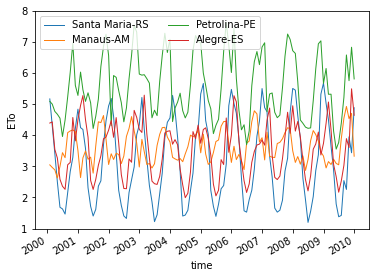

In [28]:
for city, cityCoord in cityInformation.items():
    print(city)
    varMean.sel(latitude=cityCoord[0], longitude=cityCoord[1],
                method='nearest').plot(label=city, linewidth=1)

plt.ylim(1, 8)
plt.title('')
plt.legend(ncol=2)

# Exemplo 5
Plotando e exportando em "csv" dados medios mensais de Tmax para 
algumas localidades. Normais 01/01/1990 a 31/12/2019

In [29]:
date_start, date_end = '1990-01-01','1999-12-31' # 01/01/1990 a 31/12/2019
var = xr.open_mfdataset(path_var + 'Tmax*.nc')['Tmax'].sel(time=slice(date_start, date_end))

# Nome e posicao dos pontos
posicoes = {'INPE-SP': [-23.2, -45.9],
            'UFCG-PB': [-7.2, -35.9],
            'UFC-CE': [-3.85, -38.6]}



Criando Dataframe

In [30]:
varMonthly2Export = pd.DataFrame(np.empty((12, len(posicoes))),
                                 columns=posicoes.keys(),
                                 index=range(1, 13))
varMonthly2Export

,INPE-SP,UFCG-PB,UFC-CE
1,332.8,332.800000,332.8
2,316.8,320.800000,316.8
3,316.8,316.800000,316.8
4,316.8,316.800000,316.8
5,316.8,316.800000,316.8
6,316.8,300.070803,316.8
7,316.8,316.800000,316.8
8,316.8,320.800000,316.8
9,316.8,316.800000,316.8
10,316.8,276.447699,316.8


Média para cada localização

INPE-SP
UFCG-PB
UFC-CE


,INPE-SP,UFCG-PB,UFC-CE
1,30.001108,29.689768,31.150957
2,30.125998,29.610594,31.058178
3,28.975706,29.082964,30.500353
4,27.527395,28.233126,30.363958
5,24.678328,26.978428,30.515978
6,23.598541,25.656979,30.362812
7,23.902445,24.961039,30.578226
8,25.402344,25.591784,31.258669
9,25.751303,27.278072,31.634167
10,27.156778,28.707359,31.900957


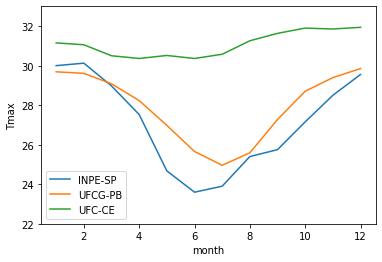

In [31]:
for name, lat_lon in posicoes.items():
    print(name)
    tmaxCityDaily = var.sel(latitude=lat_lon[0], longitude=lat_lon[1],
                            method='nearest')
    tmaxCityMonthly = tmaxCityDaily.groupby('time.month').mean('time')
    # ploting
    tmaxCityMonthly.plot(label=name)
    # concatenating in pandas
    varMonthly2Export[name] = tmaxCityMonthly

plt.ylim(22, 33)
plt.title('')
plt.legend()
varMonthly2Export

Exportando dados

In [32]:
varMonthly2Export.to_csv('dadosMensais.csv', float_format='%.1f')

# Exemplo 6
Para todas as variaveis existem dois controles

(*i*) a distancia do centro da celula a estacao mais proxima (**dist_nearest**) e;

(*ii*) o numero de estacoes/pluviometros dentro da celula (**count**). 

Aqui serao plotados os controles da grade precipitacaoo em duas localidades, Sorriso-MT e Campinas-SP (na verdade é da celula mais proxima a estas cidades).

Lendo dados

In [33]:
ds = xr.open_mfdataset(path_control + 'pr_Control*.nc')
dist_nearest = ds['dist_nearest']
count = ds['count']
ds

<xarray.Dataset>
Dimensions:       (latitude: 393, longitude: 391, time: 21762)
Coordinates:
  * time          (time) datetime64[ns] 1961-01-01 1961-01-02 ... 2020-07-31
  * latitude      (latitude) float32 -33.85 -33.75 -33.65 ... 5.15 5.25 5.35
  * longitude     (longitude) float32 -73.85 -73.75 -73.65 ... -34.95 -34.85
Data variables:
    dist_nearest  (time, latitude, longitude) float32 dask.array<chunksize=(7305, 393, 391), meta=np.ndarray>
    count         (time, latitude, longitude) float32 dask.array<chunksize=(7305, 393, 391), meta=np.ndarray>
Attributes:
    title:                Brazilian Daily Weather Gridded Data (1961-2020)
    institution:          Federal University of Espirito Santo; University of...
    institution_id:       UFES; UTEXAS
    history:              Created Tue May 31 11:39:29 2022
    temporal_resolution:  24-hourly
    contact:              alexandre.xavier@ufes.br; careyking@energy.utexas.e...
    main_code:            gerando_ncfiles_pr.py
    update_information:   https://sites.google.com/site/alexandrecandidoxavie...
    main_paper:           Xavier, A.C., Scanlon, B.R., King, C.W. and Alves, ...

Definindo posições

In [34]:
posicoes = {'Sorriso-MT': [-12.5, -55.7],
            'Campinas-SP': [-22.8, -47.0]}

Plotando distancia do pluviometro mais proximo, ao longo do tempo, que foi utilizado na interpolacao

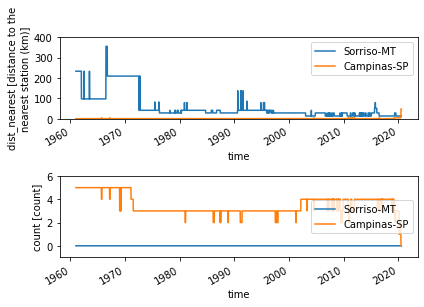

In [35]:
_, (ax1, ax2) = plt.subplots(2, 1)
for names, lat_lon in posicoes.items():
    dist_nearest.sel(latitude=lat_lon[0],
                     longitude=lat_lon[1],
                     method='nearest').plot(ax=ax1, label=names)

    # número de estações que contem na célula
    count.sel(latitude=lat_lon[0],
              longitude=lat_lon[1],
              method='nearest').plot(ax=ax2, label=names)

ax1.set_ylim(0, 400)
ax1.legend()
ax1.set_title('')
ax2.set_ylim(-1, 6)
ax2.legend()
ax2.set_title('')
plt.tight_layout()

# Exemplo 7

Calculo da diferenca sazonal entre a precipitacao e a ET0 para o Brasil utilizando os dados gradeados 
(periodo de 1980/01/01  a 2009/12/31)

Pegando variáveis

In [36]:
ETo = xr.open_mfdataset(path_var + 'ETo*.nc')
prec = xr.open_mfdataset(path_var + 'pr*.nc')

criando mascara para o continente e mar

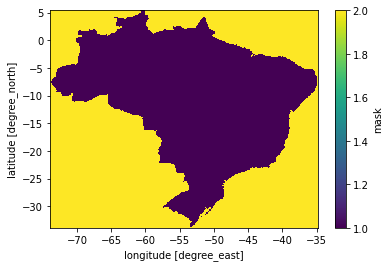

In [37]:
mask_ocean = 2 * np.ones(prec['pr'].shape[1:]) * np.isnan(prec['pr'].isel(time=0))
mask_land = 1 * np.ones(prec['pr'].shape[1:]) * ~np.isnan(prec['pr'].isel(time=0))
mask_array = mask_ocean + mask_land
mask_array.values
# incorporando mascara em ETo
ETo.coords['mask'] = (('latitude', 'longitude'), mask_array.values)
ETo.mask.plot()


Intervalo da seria historica para os calculos e reamostrando para a media mensal diaria

In [38]:
date_start, date_end = '2010-01-01', '2011-12-31' # '1980-01-01', '2009-12-31'

EToSlice = ETo['ETo'].loc[dict(time=slice(date_start, date_end))].resample(time='M').mean('time')
precSlice = prec['pr'].loc[dict(time=slice(date_start, date_end))].resample(time='M').mean('time')

# agrupando nas estacoes ('DJF', 'MAM', 'JJA', 'SON')
EToSeason = EToSlice.groupby('time.season').mean(dim='time')
precSeason = precSlice.groupby('time.season').mean(dim='time')

# calculando diferencas sazonais entre prec e ETo
diff = precSeason - EToSeason
diff

<xarray.DataArray (season: 4, latitude: 393, longitude: 391)>
dask.array<sub, shape=(4, 393, 391), dtype=float32, chunksize=(1, 393, 391), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 -33.85 -33.75 -33.65 -33.55 ... 5.15 5.25 5.35
  * longitude  (longitude) float32 -73.85 -73.75 -73.65 ... -35.05 -34.95 -34.85
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
    mask       (latitude, longitude) float64 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0

Plotando

/home/alexandre/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/alexandre/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/alexandre/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/alexandre/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/alexandre/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/alexandre/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x

Text(0.5, 0.98, 'Diferença sazonal entre precipitação e ETo')

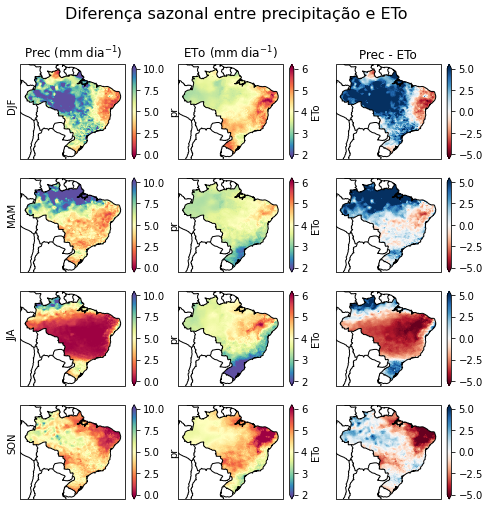

In [39]:
fig, axes = plt.subplots(nrows=4, ncols=3,
                         figsize=(8, 8),
                         subplot_kw={'projection':ccrs.PlateCarree()})

for i, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    precSeason.where(ETo.mask == 1).sel(season=season).plot(
        ax=axes[i, 0], transform=ccrs.PlateCarree(), cmap='Spectral',
        vmin=0, vmax=10, extend='both',)

    EToSeason.where(ETo.mask == 1).sel(season=season).plot(
        ax=axes[i, 1],  transform=ccrs.PlateCarree(), cmap='Spectral_r',
        vmin=2, vmax=6, extend='both',)

    diff.where(ETo.mask == 1).sel(season=season).plot(
        ax=axes[i, 2],  transform=ccrs.PlateCarree(), cmap='RdBu',
        vmin=-5, vmax=5, extend='both',)

    axes[i, 0].text(-78, -15, season,
                    rotation='vertical',
                    rotation_mode='anchor',)
    axes[i, 1].set_ylabel('')
    axes[i, 2].set_ylabel('')

for n, ax in enumerate(axes.flat):
    # pdb.set_trace()
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')
    ax.set_xlabel('')
    ax.set_title('')
    ax.coastlines()
    ax.add_feature(BORDERS)

axes[0, 0].set_title('Prec (mm dia$^{-1}$)')
axes[0, 1].set_title('ETo (mm dia$^{-1}$)')
axes[0, 2].set_title('Prec - ETo')

fig.suptitle('Diferença sazonal entre precipitação e ETo',
            fontsize=16, y=.98)

# Exemplo 8

 Abrindo e plotando a normal da temperatura media ([Tmax + Tmin]/2) do mês janeiro, período 1961/01/01-1989/12/31

Pegando Tmax e Tmin, calculando media mensais para o periodo

In [40]:
# definição das datas para calculo das normais
day_first, day_last = '1961-01-01', '1961-12-31' # '1961-01-01', '1989-12-31'

tmax = xr.open_mfdataset(path_var + 'Tmax*.nc', combine='by_coords').Tmax
tmax_month = tmax.sel(time=slice(day_first, day_last)).groupby('time.month').mean('time')

tmin = xr.open_mfdataset(path_var + 'Tmin*.nc', combine='by_coords').Tmin
tmin_month = tmin.sel(time=slice(day_first, day_last)).groupby('time.month').mean('time')

t_mean_month = ((tmax_month + tmin_month) / 2)
t_mean_month

<xarray.DataArray (month: 12, latitude: 393, longitude: 391)>
dask.array<truediv, shape=(12, 393, 391), dtype=float32, chunksize=(1, 393, 391), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 -33.85 -33.75 -33.65 -33.55 ... 5.15 5.25 5.35
  * longitude  (longitude) float32 -73.85 -73.75 -73.65 ... -35.05 -34.95 -34.85
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

plotando normal, mes de Janeiro

/home/alexandre/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


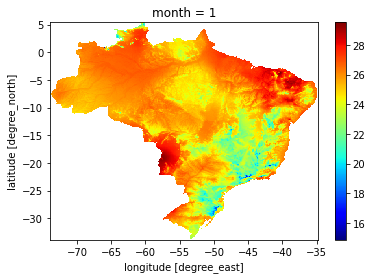

In [41]:
month = 1 # 1=janeiro, 2=fevereiro, .... 12=dezembro
t_mean_month.sel(month=month).plot(cmap=plt.cm.jet)

Plotando as medias para todos os meses

/home/alexandre/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/alexandre/anaconda3/lib/python3.8/site-packages/xarray/plot/facetgrid.py:390: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


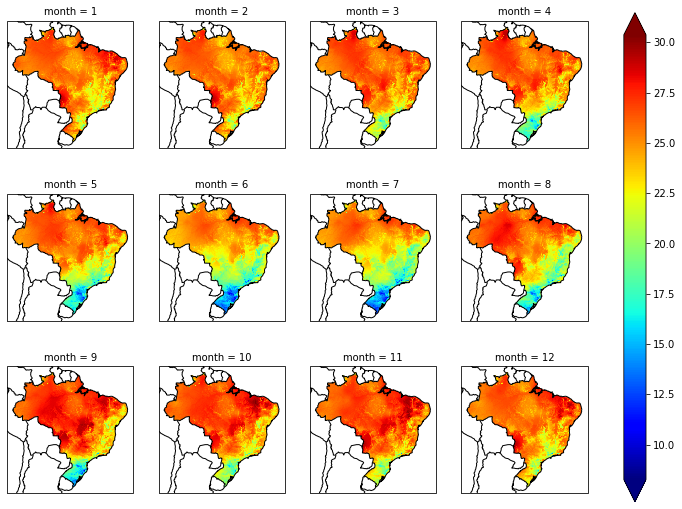

In [42]:
p = t_mean_month.plot(transform=ccrs.PlateCarree(), cmap=plt.cm.jet, col='month', col_wrap=4,
                                    subplot_kws={'projection': ccrs.PlateCarree()}, extend='both')

for ax in p.axes.flat:
    ax.coastlines()
    ax.add_feature(BORDERS)

# Exemplo 9
Comportamento da temperatuta média em diferentes regioes do Brasil

In [43]:
# definição da dadas para calculos
day_first, day_last = '1961-01-01', '2019-12-31' #'1961-01-01', '2019-12-31'

# pegando Tmax e Tmin, v2.1 e calculando as suas respectivas medias anuais
tmax = xr.open_mfdataset(path_var + 'Tmax*.nc').Tmax
tmax_yearly = tmax.sel(time=slice(day_first, day_last)).resample(time='Y').mean('time')

tmin = xr.open_mfdataset(path_var + 'Tmin*.nc').Tmin
tmin_yearly = tmin.sel(time=slice(day_first, day_last)).resample(time='Y').mean('time')

# Temperatura anual
temp_mean_yearly = (tmax_yearly+tmin_yearly) / 2

## Calculos dos pesos das celulas de acordo com sua latitude

In [44]:
weights = np.cos(np.deg2rad(temp_mean_yearly.latitude))
weights.name = "weights"

In [45]:
# definindo regioes: cada linha tem as coordenadas limites da respectiva região na ordem:
# sul, sudeste, nordeste, centro-oeste, norte
names_regions = ['Sul', 'Sudeste', 'Nordeste', 'Centro-Oeste', 'Norte']
names_regions_abre = ['S', 'SE', 'NE', 'CO', 'N',]
regiao_lat = [[-34, -22],
              [-25.6, -13.8],
              [-18.6, -1],
              [-24.3, -7],
              [-12.7, 6]]

regiao_lon = [[-58, -47.2],
              [-51.5, -39],
              [-49, -34.4],
              [-62, -45.6],
              [-74, -46.3]]

## Extraindo dados anuais e plotando os limites das regiões

/home/alexandre/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Sul


/home/alexandre/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Sudeste


/home/alexandre/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Nordeste


/home/alexandre/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Centro-Oeste


/home/alexandre/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Norte


/home/alexandre/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


,year,t_mean,region
0,1961.0,20.384335,Sul
1,1962.0,18.986124,Sul
2,1963.0,20.180061,Sul
3,1964.0,19.166435,Sul
4,1965.0,19.573282,Sul
...,...,...,...
54,2015.0,27.562170,Norte
55,2016.0,27.556654,Norte
56,2017.0,27.231632,Norte
57,2018.0,26.992542,Norte


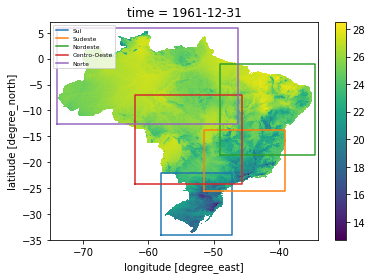

In [46]:
# figura regioes
fig, ax = plt.subplots(1)
temp_mean_yearly.isel(time=0).plot(ax=ax)

# calculation of the regions yearly Tmean
for n in range(len(names_regions)):
    print(names_regions[n])
    lat_min, lat_max = regiao_lat[n][0], regiao_lat[n][1]
    lon_min, lon_max = regiao_lon[n][0], regiao_lon[n][1]

    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
            [lat_min, lat_min, lat_max, lat_max, lat_min], label=names_regions[n])

    # creating a mask of the region
    mask = (lon_min < tmax_yearly.longitude) & (lon_max > tmax_yearly.longitude) & \
           (lat_min < tmax_yearly.latitude) &  (lat_max > tmax_yearly.latitude)
    # yearly tmean to Dataframe
    # inserindo o peso na regiao
    temp_mean_yearly_r = temp_mean_yearly.where(mask)
    temp_mean_yearly_w = temp_mean_yearly_r.weighted(weights)
    temp_mean_yearly_region_w = temp_mean_yearly_w.mean(['latitude', 'longitude']).values
    df_region = pd.DataFrame(np.c_[temp_mean_yearly_r.time.dt.year,
                                   temp_mean_yearly_region_w], columns=['year', 't_mean'])
    df_region['region'] = names_regions[n]
    if n == 0:
        df_all = df_region
    else:
        df_all = pd.concat([df_all, df_region])

ax.legend(loc=2, prop={'size': 6})
ax.set_xlim(-75, -34)
ax.set_ylim(-35, 7)
df_all

## Grafico *simple linear regression* "year" versus "t_mean" para cada regiao

array([[1.94448452e-02, 6.59646820e-01, 1.33087589e-08, 2.93446095e-03],
       [2.31499339e-02, 7.78989454e-01, 3.72930997e-13, 2.46816355e-03],
       [2.86702846e-02, 8.55059201e-01, 6.75405004e-18, 2.30288687e-03],
       [2.54842279e-02, 8.43293775e-01, 5.27934515e-17, 2.15127317e-03],
       [2.81528531e-02, 8.77853331e-01, 7.11205186e-20, 2.03439216e-03]])

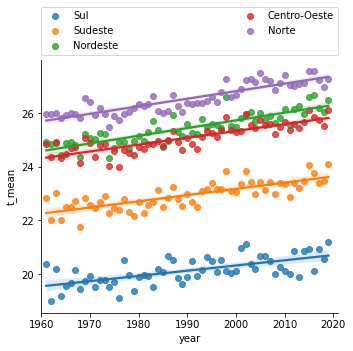

In [47]:
g = sns.lmplot(x='year', y="t_mean", hue="region", data=df_all, legend=False)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
       ncol=2, mode="expand", borderaxespad=0.)
plt.xlim(1960,2021)
plt.tight_layout()

# estatisticas por regiao na variavel "stat_region"
df_all['year_ano'] = df_all['year']
df_all['datas'] = df_all.index.values
df_all['name_legend'] = ''
stat_region = np.zeros((5,4))
for n in np.arange(5):
    x = df_all[df_all['region'] == names_regions[n]].year_ano.values
    y = df_all[df_all['region'] == names_regions[n]].t_mean.values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    stat_region[n] = np.array([slope, r_value, p_value, std_err])

stat_region

# Exportando todas as variaveis para determinadas posicoes geograficas

Posições: Colocar em ordem, separando por virgula. Neste exemplo temos dois pontos em que as coordenadas (lat, lon): (*i*) (-20.6, -44.6) e (*ii*) (-21.0, -44.1). 
Pode-se colocar quantos pontos quiser, apenas separe por virgula.

In [ ]:
lat = [-20.6, -21.0]
lon = [-44.6, -44.1]

# variables names
var_names = ['Rs', 'u2','Tmax', 'Tmin', 'RH', 'pr', 'ETo']

# function to read the netcdf files
def rawData(var2get_xr, var_name2get):
    return var2get_xr[var_name2get].sel(longitude=xr.DataArray(lon, dims='z'),
                                          latitude=xr.DataArray(lat, dims='z'),
                                          method='nearest').values

# getting data from NetCDF files
for n, var_name2get in enumerate(var_names):
    print("getting " + var_name2get)
    var2get_xr = xr.open_mfdataset(path_var + var_name2get + '*.nc')
    if n == 0:
        var_ar = rawData(var2get_xr, var_name2get)
        n_lines = var_ar.shape[0]
        time = var2get_xr.time.values
    else:
        var_ar = np.c_[var_ar, rawData(var2get_xr, var_name2get)]

# saving
for n in range(len(lat)):
    print('arquivo {} de um total de {}'.format(n+1, len(lat)))
    name_file =  'lat{:.2f}_lon{:.2f}.csv'.format(lat[n], lon[n])
    if ~np.isnan(var_ar[0, n]):
        file = var_ar[:, n::len(lon)]
        pd.DataFrame(file, index=time, columns=var_names).to_csv(name_file, float_format='%.1f')

getting Rs
getting u2
getting Tmax
getting Tmin
getting RH
